### Fake News Detector - Feature Engineering

In this notebook we look at two features to determine whether a news article is fake or real. We look into the credibility of the news source (proportion of fake articles) and the keywords in the article title to make this prediction.



In [2]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
uploaded = files.upload()

Saving cleaned_dataset.csv to cleaned_dataset.csv


In [4]:
data = pd.read_csv("cleaned_dataset.csv")

In [5]:
data.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


Feature 1: Top keywords in fake news articles

In [6]:
#calculate the most frequently used fake news keyword

#create a table only containing fake news
fake_news_data = data[data['label'] == "Fake"]

#convert data into numerical representations
vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(fake_news_data["text"])

#create an array that contains the frequency of each word
word_frequencies = X.toarray().sum(axis=0)

#retrieve the keywords associated with the frequencies
feature_names = vectorizer.get_feature_names_out()

#extract the top 10 words with the highest frequencies by sorting the word_frequencies array in descending order
keywords = [feature_names[i] for i in word_frequencies.argsort()[-10:][::-1]]
print(keywords)

['clinton', 'trump', 'said', 'hillary', 'people', 'like', 'just', 'new', 'election', 'time']


Feature 2: Credibility of News Source


In [7]:
#calculate the percentage of fake news per news source

#calculate the number of news articles per news source
site_counts = data["site_url"].value_counts()

#calculate the number of fake news articles per news source
fake_site_counts = data[data["label"] == 'Fake']["site_url"].value_counts()

fake_news_percentage = fake_site_counts / site_counts

Create a function that predicts whether a news source is real or fake

In [8]:
#create a function to predict whether the news is fake or real based on the two features

def fakenewsprediction(row):

  title = data.iloc[row, 2]
  news_source = data.iloc[row, 5]
  classification = data.iloc[row, 8]

  #investigate whether the title contains any of the top fake keywords
  title_contains_keyword = any(keyword in title.lower() for keyword in keywords)

  #create a loop
  #if news source is in the fake news percentage dataset then take the fake news source % otherwise 0%.
  if news_source in fake_news_percentage:
    source_fake_percentage = fake_news_percentage[news_source]
  else:
    source_fake_percentage = 0.0

  #create a loop to return prediction
  #if title contains a fake keyword and the source has a fake news % greater than 50% then fake news
  if title_contains_keyword and source_fake_percentage > 0.5:
    return "Fake"
  else:
    return "Real"





Testing the detector

In [9]:
#test function
row = 10

title = data.iloc[row, 2]
news_source = data.iloc[row, 5]
classification = data.iloc[row, 8]


prediction = fakenewsprediction(row)

print(f"Title: {title}")
print(f"News Source: {news_source}")
print(f"Prediction: {prediction}")
print(f"Classification: {classification}")

Title: yikes hillary goes off the railspulls a howard dean video
News Source: 100percentfedup.com
Prediction: Real
Classification: Real


Measuring the accuracy of the function

In [10]:
#create a new column titled prediction
data['Prediction'] = None

# Iterate through each row and store the prediction
for index, row in data.iterrows():
    prediction = fakenewsprediction(index)
    data.at[index, 'Prediction'] = prediction

In [11]:
#create a function that checks if the prediction is the same as the classification

def accuracy_check(row):
  if data.iloc[row, 8]  == data.iloc[row, 12]:
    return 1
  else:
    return 0

In [12]:
#create a new column titled accuracy
data['accuracy'] = None


#Iterate through each row and store the output
for index, row in data.iterrows():
    acc_check = accuracy_check(index)
    data.at[index, 'accuracy'] = acc_check

In [13]:
data.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage,Prediction,accuracy
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0,Real,1
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0,Real,1
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0,Real,1
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0,Real,1
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0,Real,1


In [14]:
total_accurate = data["accuracy"].value_counts()

num_rows = len(data)

accuracy_percent = total_accurate / num_rows

print(accuracy_percent)

accuracy
1    0.614251
0    0.385749
Name: count, dtype: float64


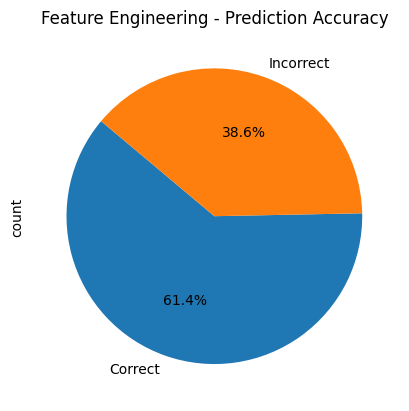

In [15]:
#display results in a pie chart
total_accurate.index = ['Correct', 'Incorrect']
total_accurate.plot(kind='pie', autopct='%1.1f%%', startangle=140)

plt.title('Feature Engineering - Prediction Accuracy')
plt.show()

As we can see from the results this method made 61% corrrect predictions and 39% incorrect predictions. For only looking at two features the performance is not terrible. Although, improvements can be made through investigating more features such as text length.